In [1]:
# https://en.wikipedia.org/wiki/Flags_of_the_U.S._states_and_territories

In [2]:
import cairosvg
import pandas as pd
import os
import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = 'States\\'
test_path = 'States\\'

In [4]:
dim1 = []
dim2 = []

for image_folder in os.listdir(train_path):
    try:
        img = imread(train_path + image_folder + '\\' + image_folder +'.png')
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)
    except:
        print(image_folder)

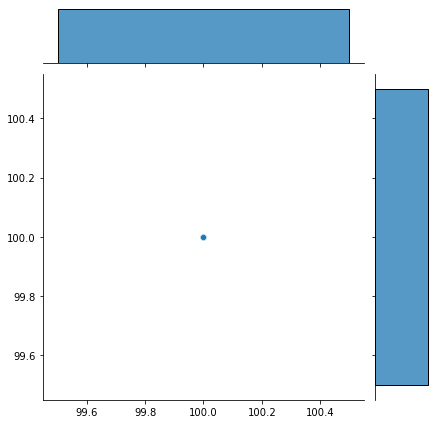

In [5]:
sns.jointplot(dim1,dim2)

In [6]:
image_shape = (int(round(np.mean(dim1))),int(round(np.mean(dim2))),3)
image_shape 

(100, 100, 3)

In [7]:
image_gen = ImageDataGenerator(rotation_range=40, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='constant' # Fill in missing pixels with the nearest filled value
                              )

In [8]:
image_gen.flow_from_directory(train_path)

Found 50 images belonging to 50 classes.


In [9]:
image_gen.flow_from_directory(test_path)

Found 50 images belonging to 50 classes.


In [10]:
out_nodes = len(os.listdir(train_path))
out_nodes

50

In [11]:
model = Sequential()
    
# VGG Block
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=image_shape))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# VGG Block    
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# VGG Block    
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# # VGG Block    
# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# example output part of the model
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.2))

model.add(Dense(out_nodes, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       7

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=7)

In [14]:
batch_size = 64

In [15]:
image_shape

(100, 100, 3)

In [16]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 50 images belonging to 50 classes.
Found 50 images belonging to 50 classes.


In [17]:
results = model.fit_generator(train_image_gen,epochs=500,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
1/1 [==============================] - 0s 483ms/step - loss: 4.5238 - accuracy: 0.0200 - val_loss: 6.8501 - val_accuracy: 0.0400
Epoch 2/500
1/1 [==============================] - 0s 190ms/step - loss: 7.0392 - accuracy: 0.0200 - val_loss: 5.0254 - val_accuracy: 0.0200
Epoch 3/500
1/1 [==============================] - 0s 209ms/step - loss: 5.0535 - accuracy: 0.0200 - val_loss: 4.0682 - val_accuracy: 0.0400
Epoch 4/500
1/1 [==============================] - 0s 183ms/step - loss: 4.0776 - accuracy: 0.0400 - val_loss: 3.8623 - val_accuracy: 0.0200
Epoch 5/500
1/1 [==============================] - 0s 196ms/step - loss: 3.8513 - accuracy: 0.0400 - val_loss: 3.8040 - val_accuracy: 0.0400
Epoch 6/500
1/1 [==============================] - 0s 200ms/step - loss: 3.8422 - accuracy: 0.0000e+00 - val_loss: 3.7980 - val_accuracy: 0.0200
Epoch 7/500
1/1 [==============================] - 0s 192ms/step - loss: 3

Epoch 57/500
1/1 [==============================] - 0s 206ms/step - loss: 0.2989 - accuracy: 0.9000 - val_loss: 0.4543 - val_accuracy: 0.8600
Epoch 58/500
1/1 [==============================] - 0s 193ms/step - loss: 0.1791 - accuracy: 0.9600 - val_loss: 0.3071 - val_accuracy: 0.8800
Epoch 59/500
1/1 [==============================] - 0s 197ms/step - loss: 0.4142 - accuracy: 0.9000 - val_loss: 0.2797 - val_accuracy: 0.9400
Epoch 60/500
1/1 [==============================] - 0s 210ms/step - loss: 0.3888 - accuracy: 0.9000 - val_loss: 0.2422 - val_accuracy: 0.9000
Epoch 61/500
1/1 [==============================] - 0s 212ms/step - loss: 0.2702 - accuracy: 0.9200 - val_loss: 0.1603 - val_accuracy: 0.9600
Epoch 62/500
1/1 [==============================] - 0s 196ms/step - loss: 0.4509 - accuracy: 0.8800 - val_loss: 0.1352 - val_accuracy: 0.9400
Epoch 63/500
1/1 [==============================] - 0s 206ms/step - loss: 0.2079 - accuracy: 0.9600 - val_loss: 0.4698 - val_accuracy: 0.8800
Epoch 

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

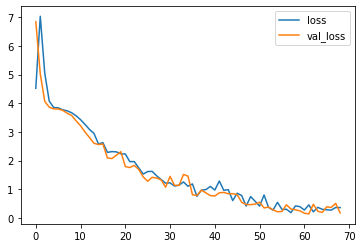

In [19]:
losses[['loss','val_loss']].plot()

In [20]:
model.metrics_names

['loss', 'accuracy']

In [24]:
from datetime import date

today = date.today()
print(today)

2021-06-22


In [ ]:
model.save("Models\\flag_model_"+today)